# Load functions

In [25]:
%run ../../functions/1_DEGAnalysis.py

sns.set(style="ticks")
sns.set_context("notebook")


# Subset quality control
We performed a quality control analysis on control 7 that was replicated in 3 batches. We also performed a proportion analysis for cell proportion between samples, cell proportions according to disease activity 

/var/folders/pd/ymk8f61j3ns7t7f28xfs8q4r0000gp/T/ipykernel_38654/1833196364.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_qc.obs['Sample_batch'] = [s+"_"+b for s,b in zip(adata_qc.obs["Sample"],adata_qc.obs["batch"])]


"from sklearn import metrics\nmetrics.silhouette_score(adata.X, adata.obs['louvain'], metric = 'euclidean')\nsilhouette_score(adata.X, adata.uns['neighbors']['distances'], metric='precomputed')\nadata.obsm['X_pca']\n"

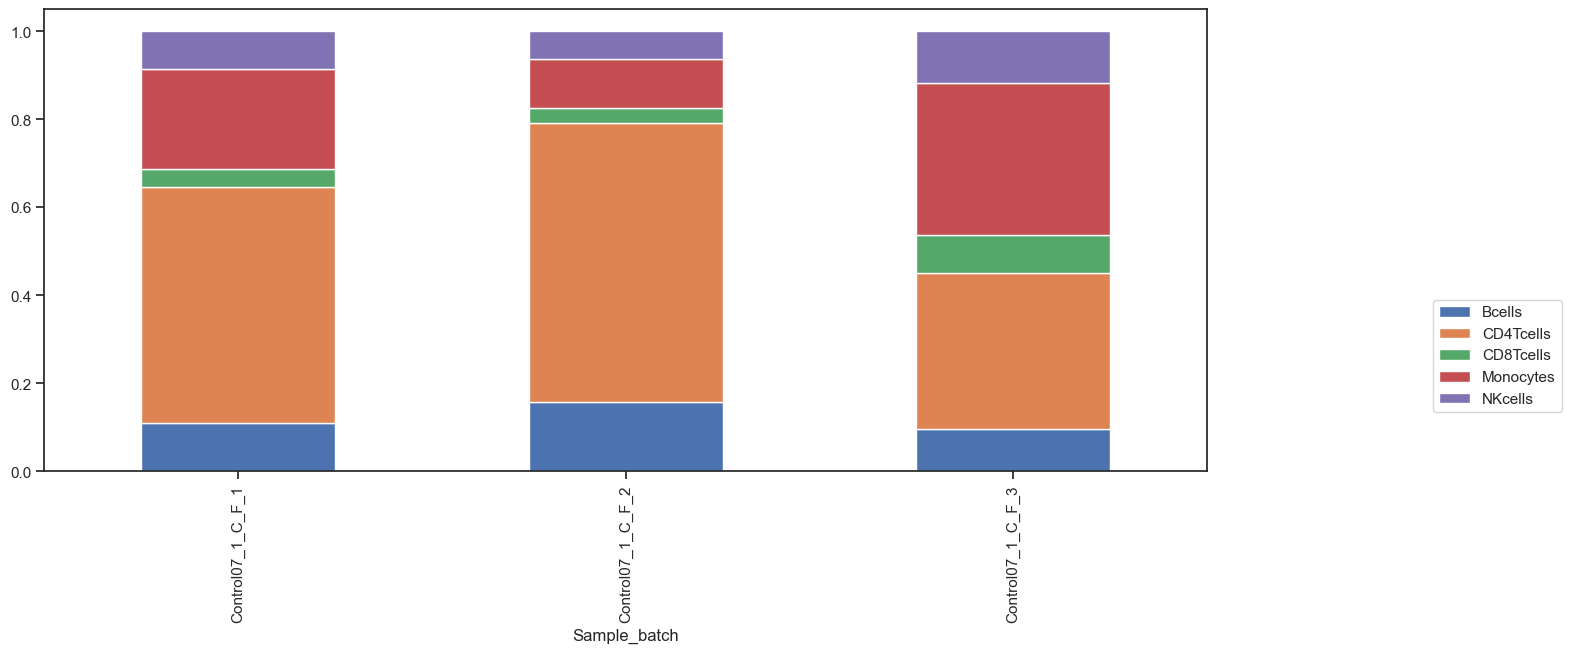

In [8]:
### Quality Control for Control 7 
adata = sc.read('./dataOutput/adata/final.h5ad')
adata_qc =adata[(adata.obs["Sample"].str.contains("Control07")),:]
adata_qc.obs['Sample_batch'] = [s+"_"+b for s,b in zip(adata_qc.obs["Sample"],adata_qc.obs["batch"])]

tmp = pd.crosstab(adata_qc.obs['Sample_batch'],adata_qc.obs['rough_annot'], normalize= "index" )
tmp.plot.bar(stacked=True, figsize=(15,6)).legend(loc='center', bbox_to_anchor=(1, 0., 0.5, 0.5))


# Rough annotation proportion analysis 

/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scanpy/tools/_embedding_density.py:169: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[density_covariate] = density_values


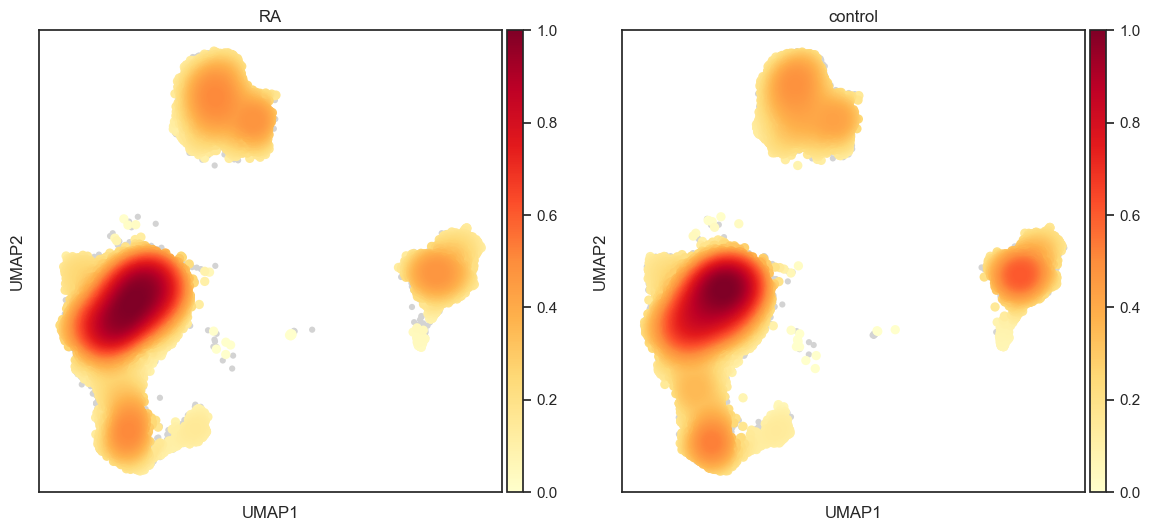

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA vs control (paired pvals): {'Bcells': 0.17425537109375, 'CD4Tcells': 0.4306793212890625, 'CD8Tcells': 0.644134521484375, 'Monocytes': 0.3778228759765625, 'NKcells': 0.4306793212890625}


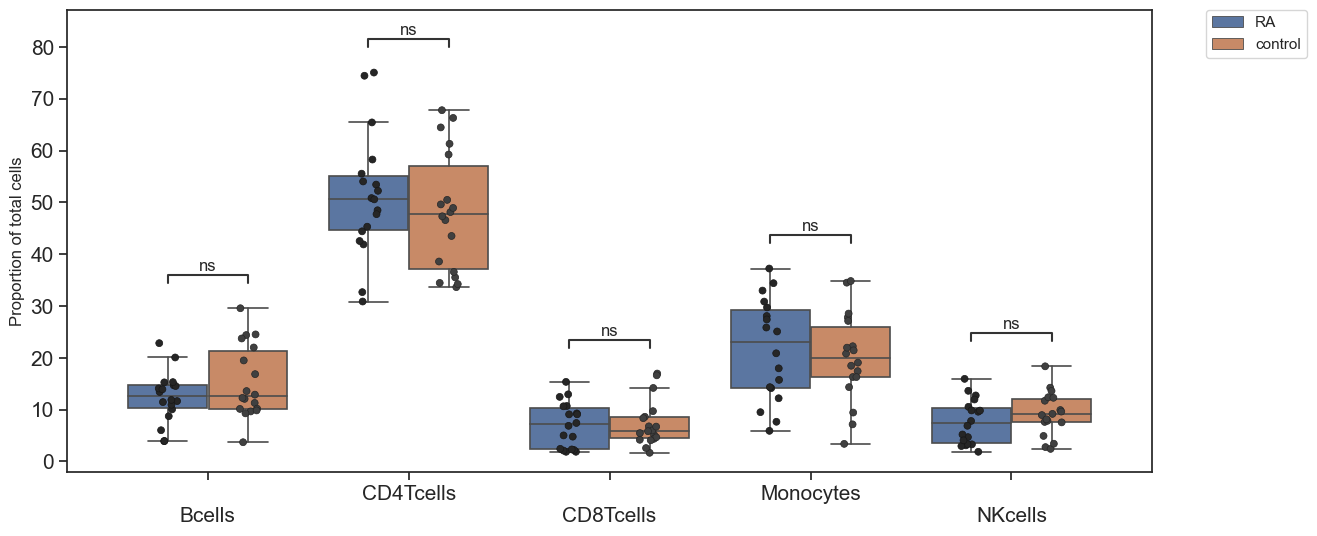

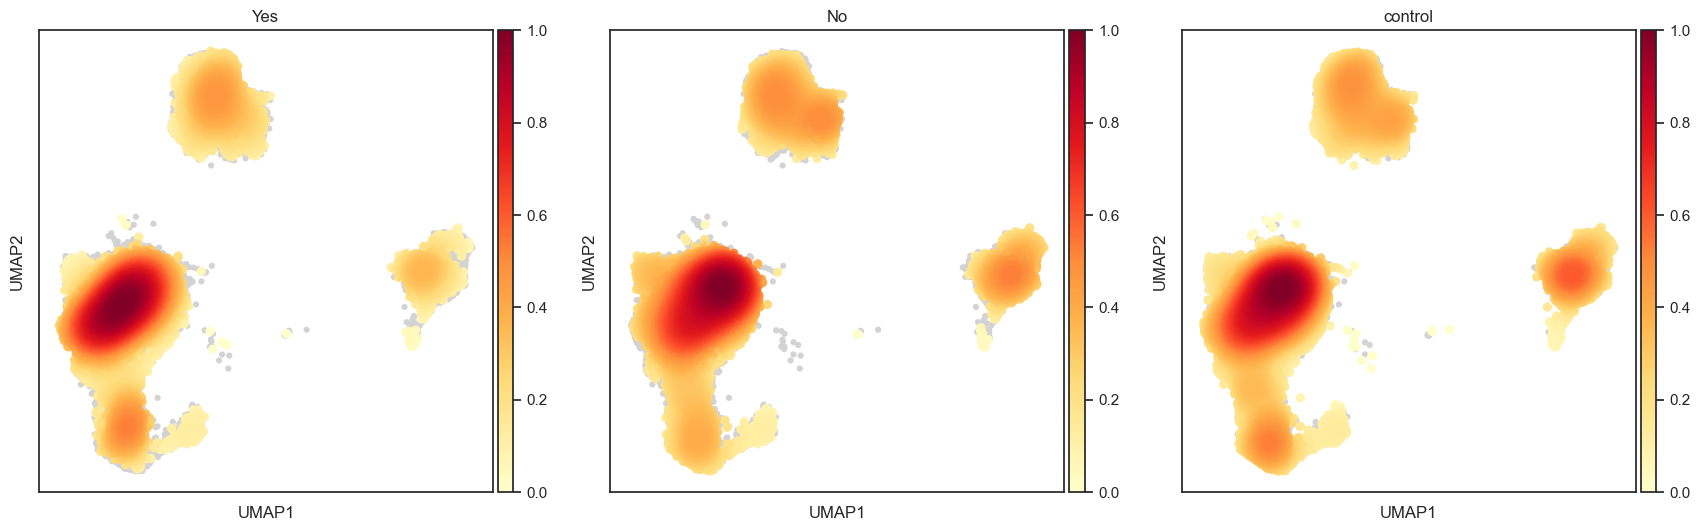

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA disease activity vs control (paired pvals): {'Bcells': 0.8125, 'CD4Tcells': 0.46875, 'CD8Tcells': 0.8125, 'Monocytes': 0.8125, 'NKcells': 0.46875}
RA no disease activity vs control (paired pvals): {'Bcells': 0.25, 'CD4Tcells': 0.7421875, 'CD8Tcells': 0.546875, 'Monocytes': 0.1953125, 'NKcells': 0.7421875}


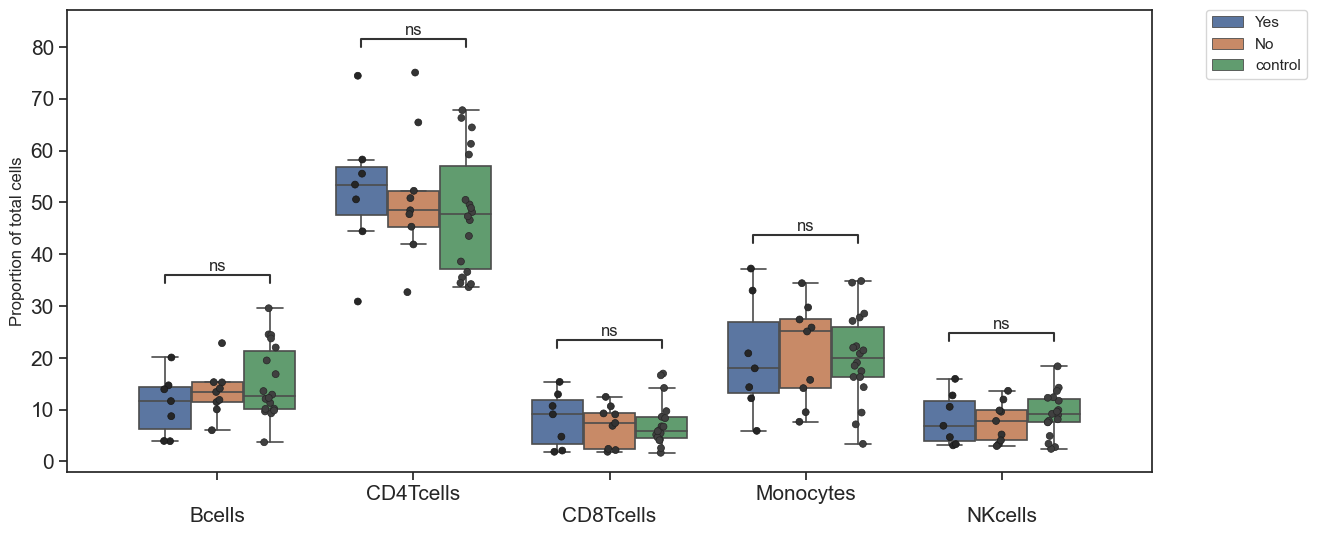

In [64]:
### Params
color_subset = ['#ea4e40','#f37761', '#d33028', '#b3302a', '#72322f',
                '#FFD6A5','#d08c60','#99582a',
                '#afaed4','#8d89c0','#705eaa', '#7209b7','#3c096c',
                '#8ed08b', '#2c944c',
                '#2a6f97','#4cc9f0','#023e8a','#0267c1',  '#A0C4FF']

### Load data
adata = sc.read('./dataOutput/adata/final.h5ad')

# keep only control 7 from batch 3
adata= adata[~(adata.obs["Sample"].str.contains("Control07") & adata.obs["batch"].str.contains("1|2")),:]

### RA vs control
# Density plot
sc.tl.embedding_density(adata, basis='umap', groupby="dx")
sc.pl.embedding_density(adata, basis='umap', key="umap_density_%s"%"dx", 
                            group=["RA", "control"], save="Figure3A_all.pdf")

# unpaired analysis
cell_subset_df = compositionalAnalysis(adata, hue_groups=["RA", "control"], corr=None, hue="dx",
                                       subset_col="rough_annot", sample_col="Sample", single_pair=True, 
                                       filename= "./figures/Figure3B_all_proportion_RAvsControl.pdf",
                          height=6, width=14, min_cells=0, density=False, stats_test=scipy.stats.mannwhitneyu, return_df=True)

# Paired testing statistics
cell_subset_df["pair_index_CW"] = cell_subset_df["Sample"].map(dict(zip(adata.obs["Sample"], adata.obs["pair_index_CW"])))
pvals = pairedTestByCellType(cell_subset_df, subset_col="rough_annot", groupby="dx", 
                     groupA="RA", groupB="control",  pair_index="pair_index_CW", 
                     compare_col="proportion", corr=None, stats_test=scipy.stats.wilcoxon) #ttest_rel
print("RA vs control (paired pvals): %s"%str(pvals))

### Disease activity (Yes vs no vs control)
# Density plot
sc.tl.embedding_density(adata, basis='umap', groupby="activity_python_binary_crp")
sc.pl.embedding_density(adata, basis='umap', key="umap_density_activity_python_binary_crp", 
                            group=["Yes", "No", "control"], save="Figure3A_all.pdf")

# unpaired analysis
cell_subset_df = compositionalAnalysis(adata, hue_groups=["Yes", "No", "control"], corr=None, hue="activity_python_binary_crp", 
                      subset_col="rough_annot",  sample_col="Sample", single_pair=True, height=6, 
                                       filename= "./figures/Figure3B_all_proportion_RAActivity.pdf",
                      width=14, min_cells=0, density=False, stats_test=scipy.stats.kruskal, 
                      return_df=True)

# Paired testing statistics
cell_subset_df["pair_index_CW"] = cell_subset_df["Sample"].map(dict(zip(adata.obs["Sample"], adata.obs["pair_index_CW"])))
pvals = pairedTestByCellType(cell_subset_df, subset_col="rough_annot", groupby="activity_python_binary_crp", 
                     groupA="Yes", groupB="control",  pair_index="pair_index_CW", 
                     compare_col="proportion", corr=None, stats_test=scipy.stats.wilcoxon) #ttest_rel
print("RA disease activity vs control (paired pvals): %s"%str(pvals))

pvals = pairedTestByCellType(cell_subset_df, subset_col="rough_annot", groupby="activity_python_binary_crp", 
                     groupA="No", groupB="control",  pair_index="pair_index_CW", 
                     compare_col="proportion", corr=None, stats_test=scipy.stats.wilcoxon) #ttest_rel
print("RA no disease activity vs control (paired pvals): %s"%str(pvals))




# Fine annotation proportion analysis

/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


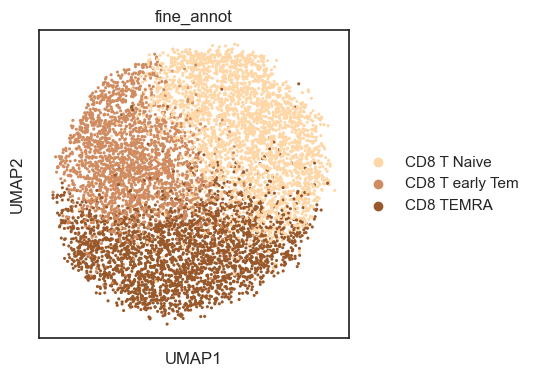

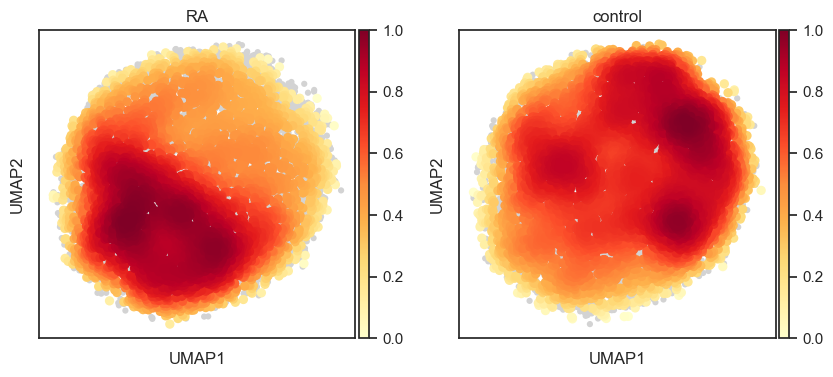

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA vs control (paired pvals): {'CD8 T Naive': 0.3778228759765625, 'CD8 T early Tem': 0.17425537109375, 'CD8 TEMRA': 1.0}


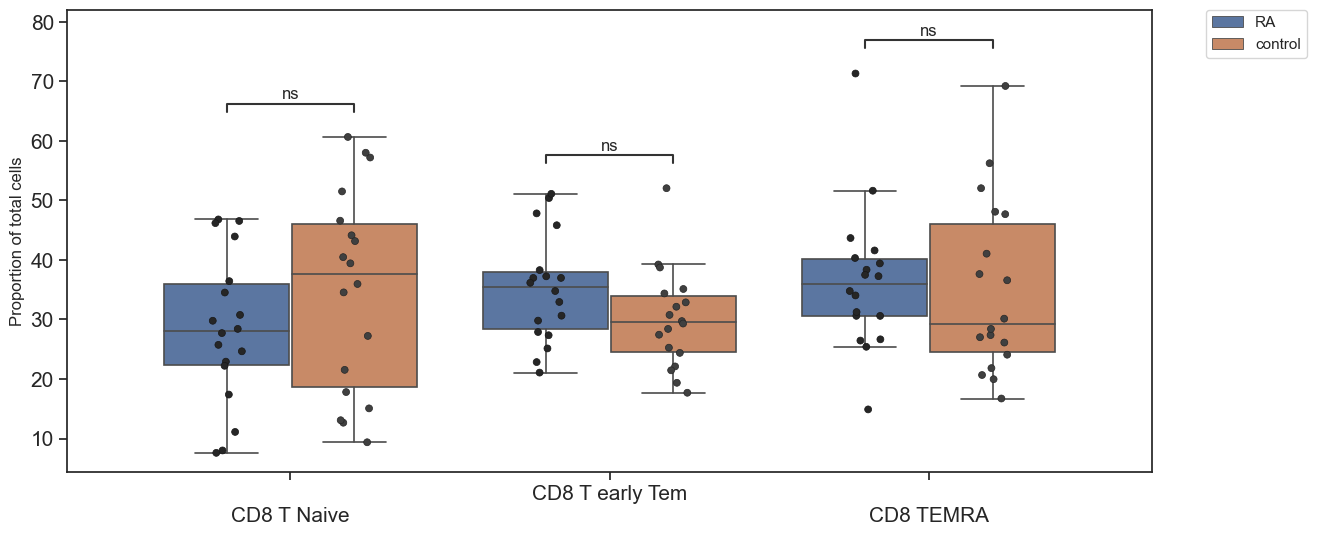

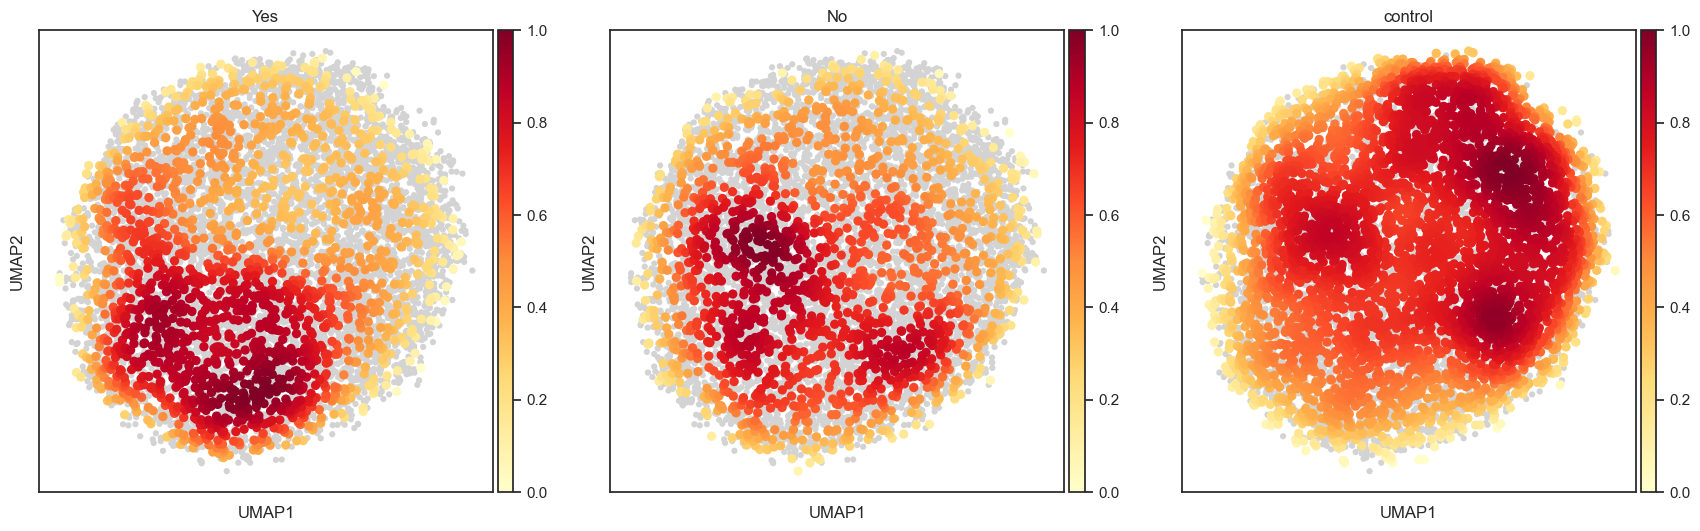

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA disease activity vs control (paired pvals): {'CD8 T Naive': 0.46875, 'CD8 T early Tem': 0.6875, 'CD8 TEMRA': 0.375}
RA no disease activity vs control (paired pvals): {'CD8 T Naive': 0.7421875, 'CD8 T early Tem': 0.1484375, 'CD8 TEMRA': 0.3125}


/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


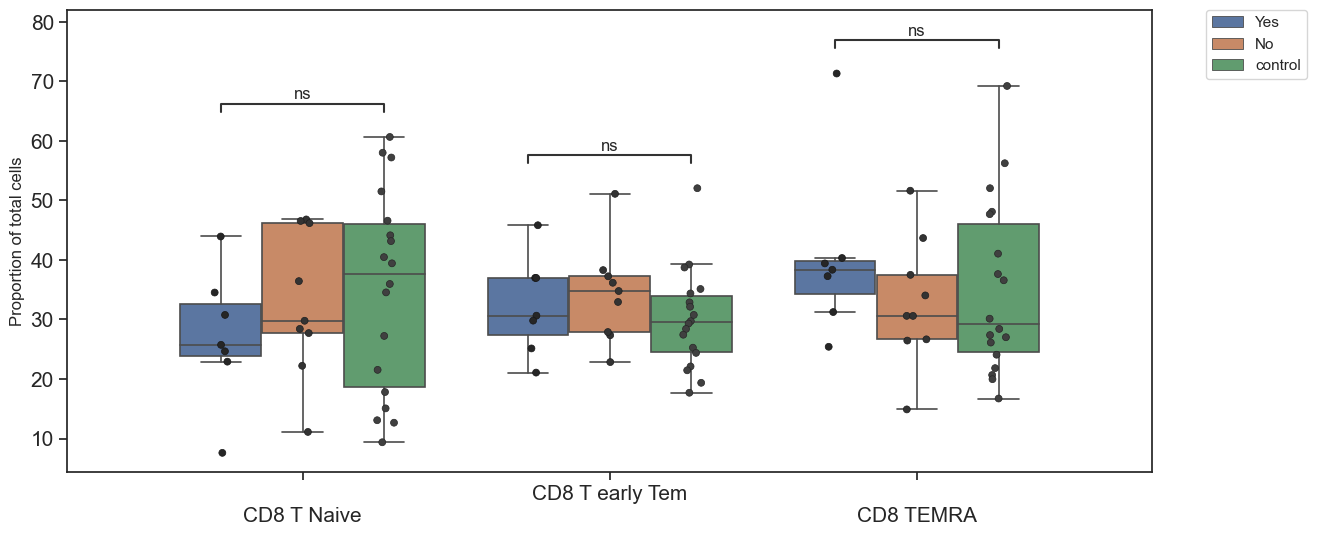

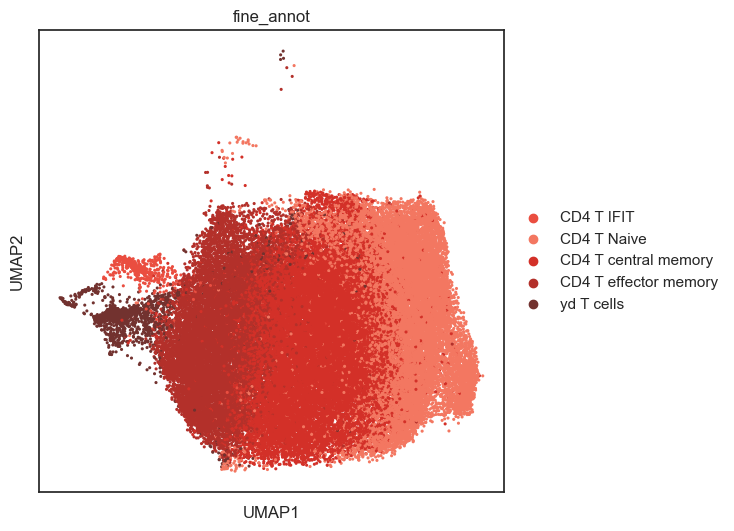

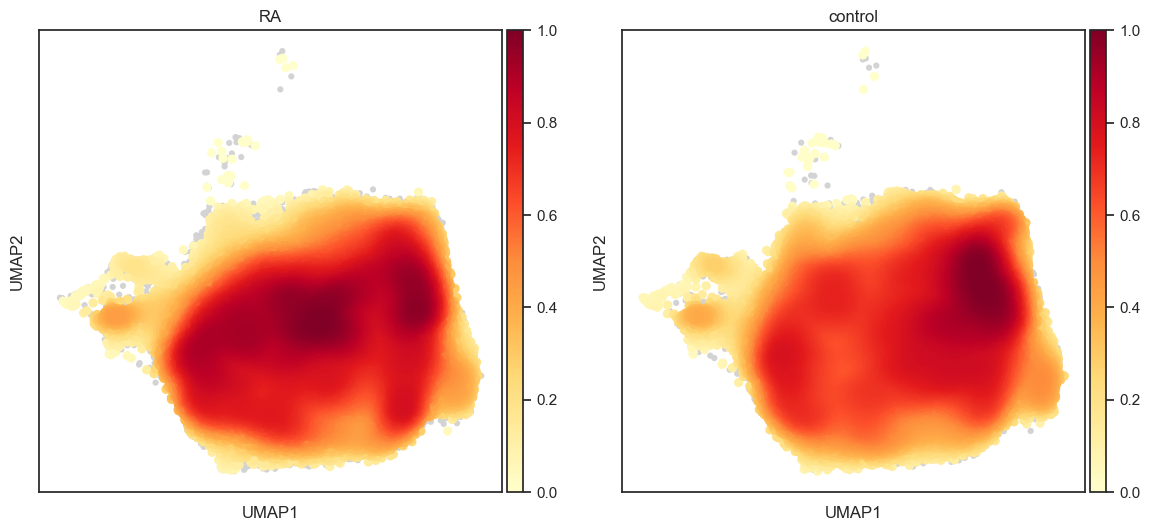

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA vs control (paired pvals): {'CD4 T IFIT': 0.981116590883351, 'CD4 T Naive': 0.4171142578125, 'CD4 T central memory': 0.34654998779296875, 'CD4 T effector memory': 0.7018814086914062, 'yd T cells': 0.49507904052734375}


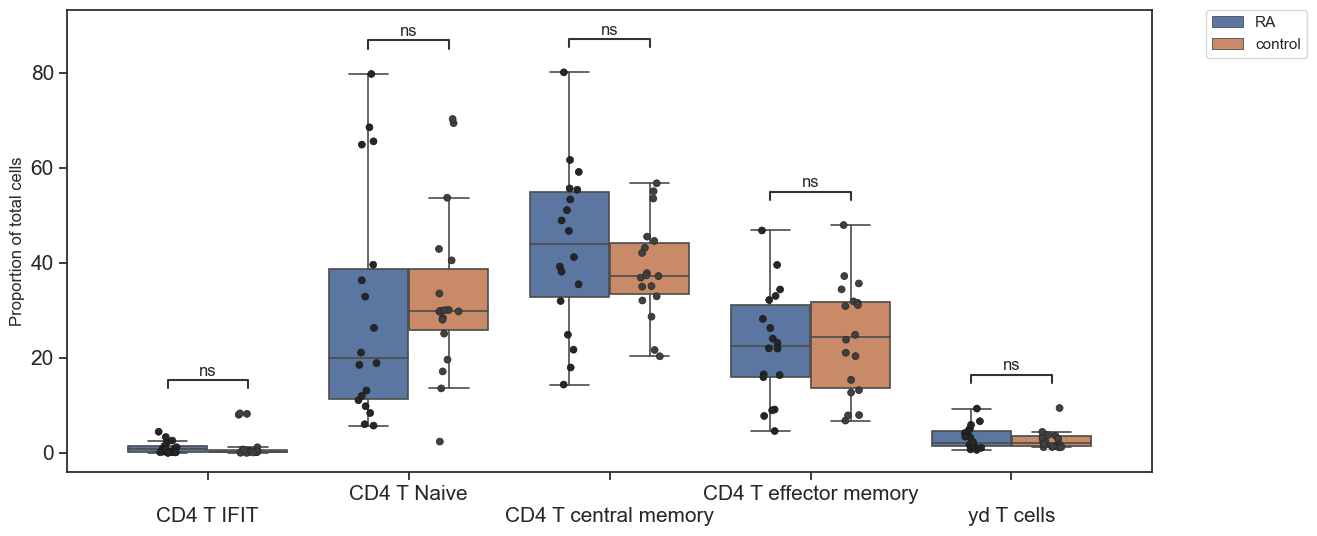

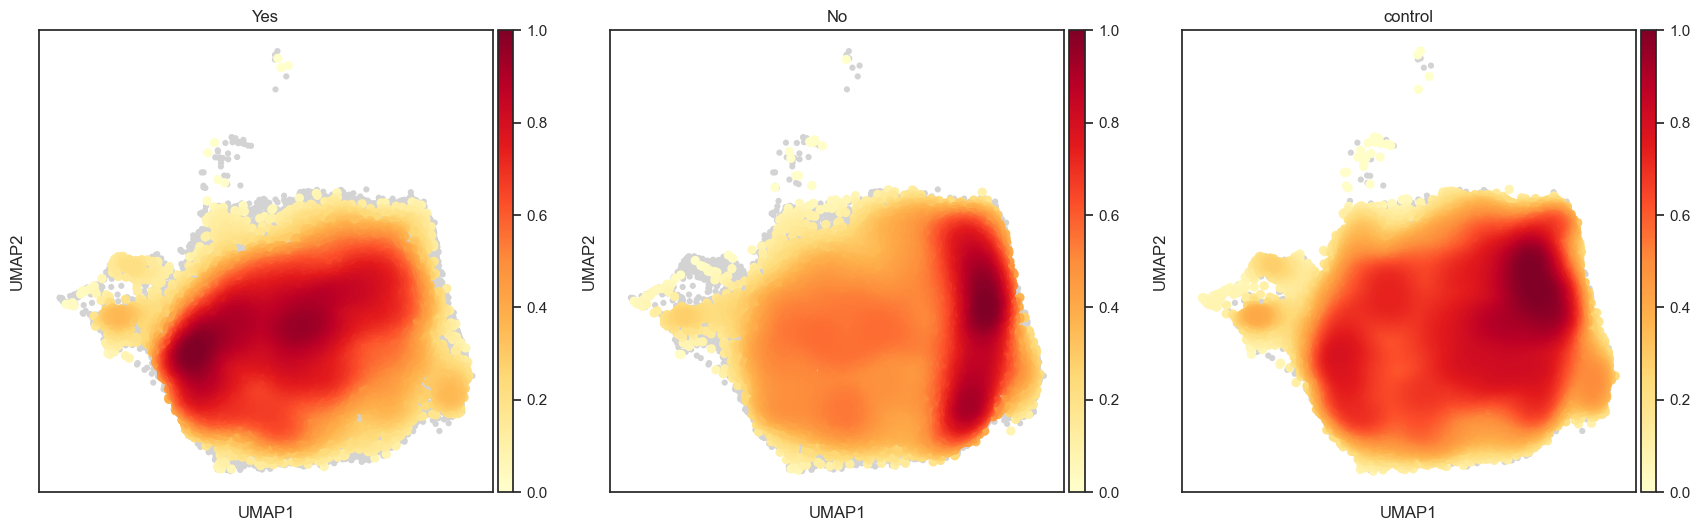

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA disease activity vs control (paired pvals): {'CD4 T IFIT': 0.46875, 'CD4 T Naive': 0.296875, 'CD4 T central memory': 0.15625, 'CD4 T effector memory': 0.6875, 'yd T cells': 1.0}
RA no disease activity vs control (paired pvals): {'CD4 T IFIT': 0.32698934959801507, 'CD4 T Naive': 1.0, 'CD4 T central memory': 0.65234375, 'CD4 T effector memory': 0.65234375, 'yd T cells': 0.30078125}


/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scipy/stats/_morestats.py:3351: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


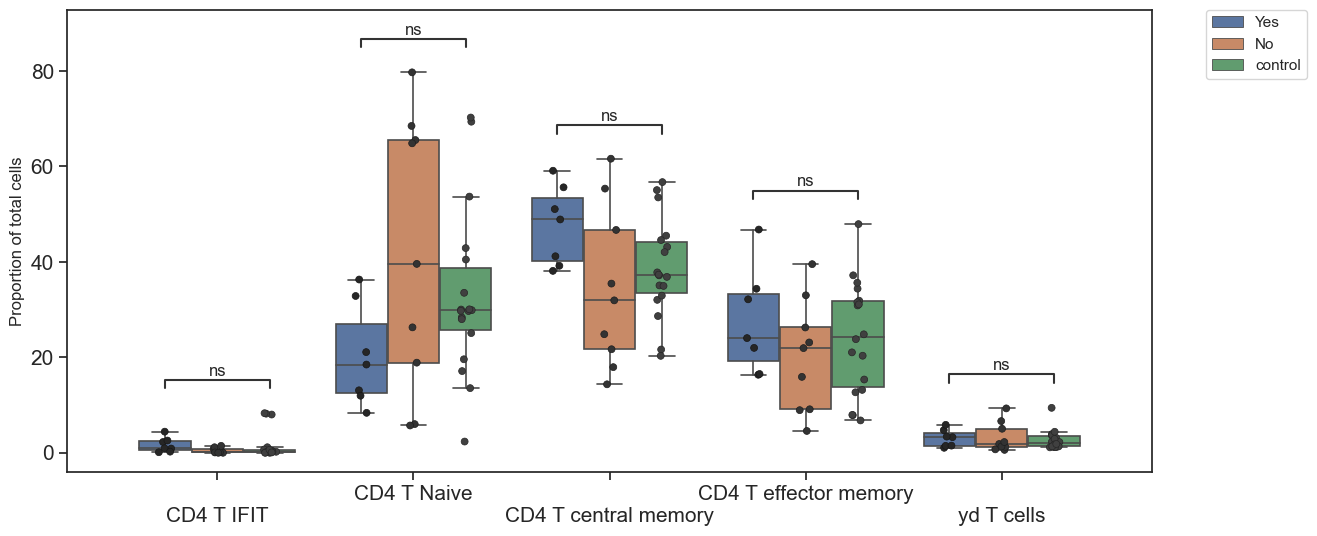

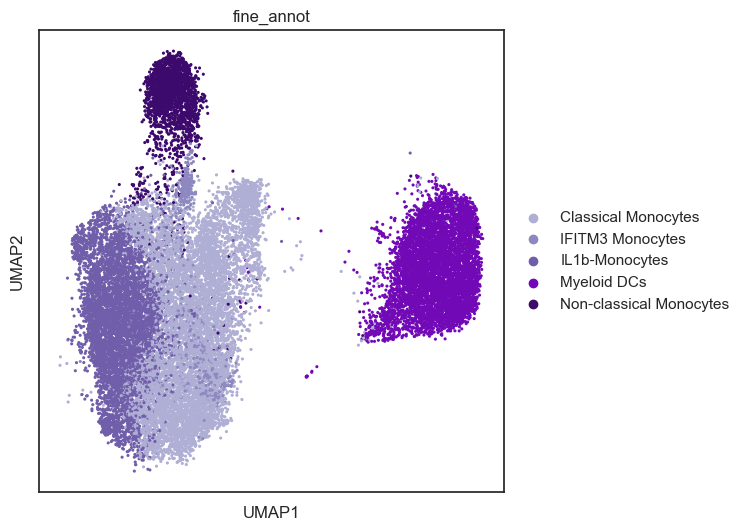

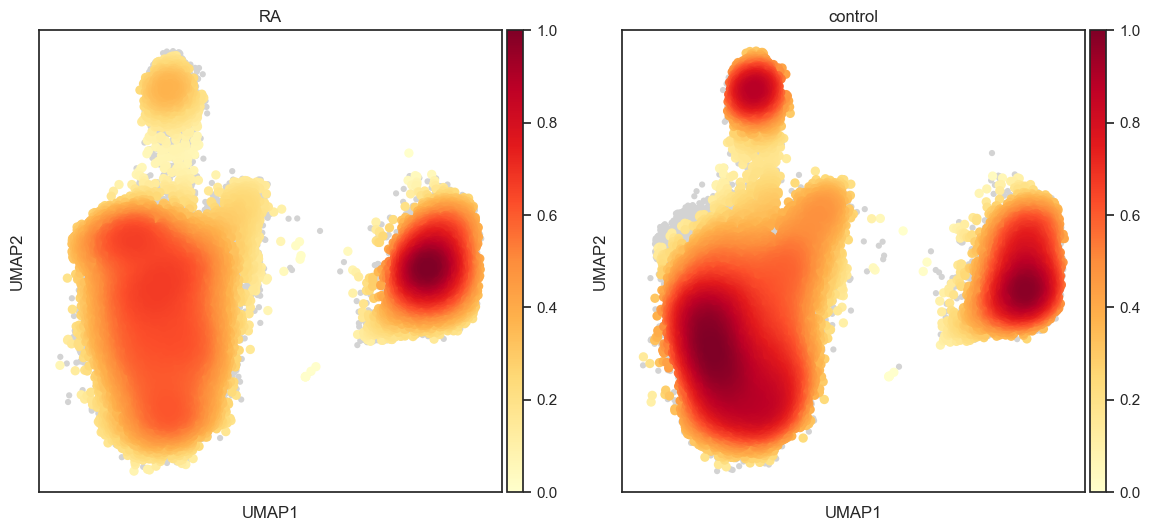

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA vs control (paired pvals): {'Classical Monocytes': 0.8650436401367188, 'IFITM3 Monocytes': 0.5861743444807836, 'IL1b-Monocytes': 0.550872802734375, 'Myeloid DCs': 0.49507904052734375, 'Non-classical Monocytes': 0.02367401123046875}


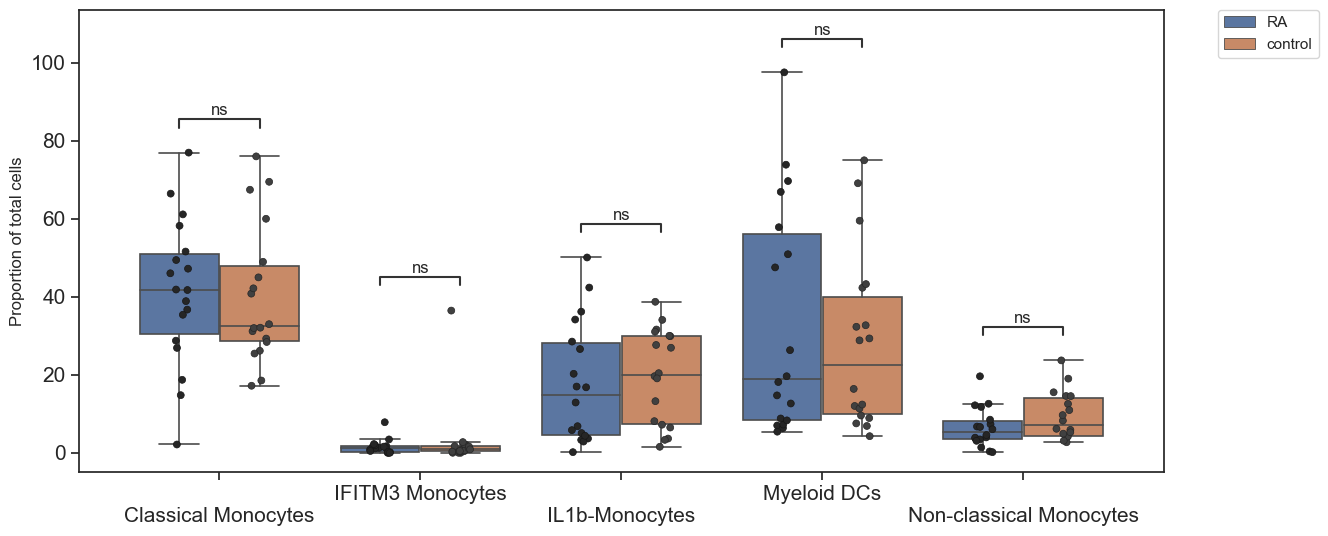

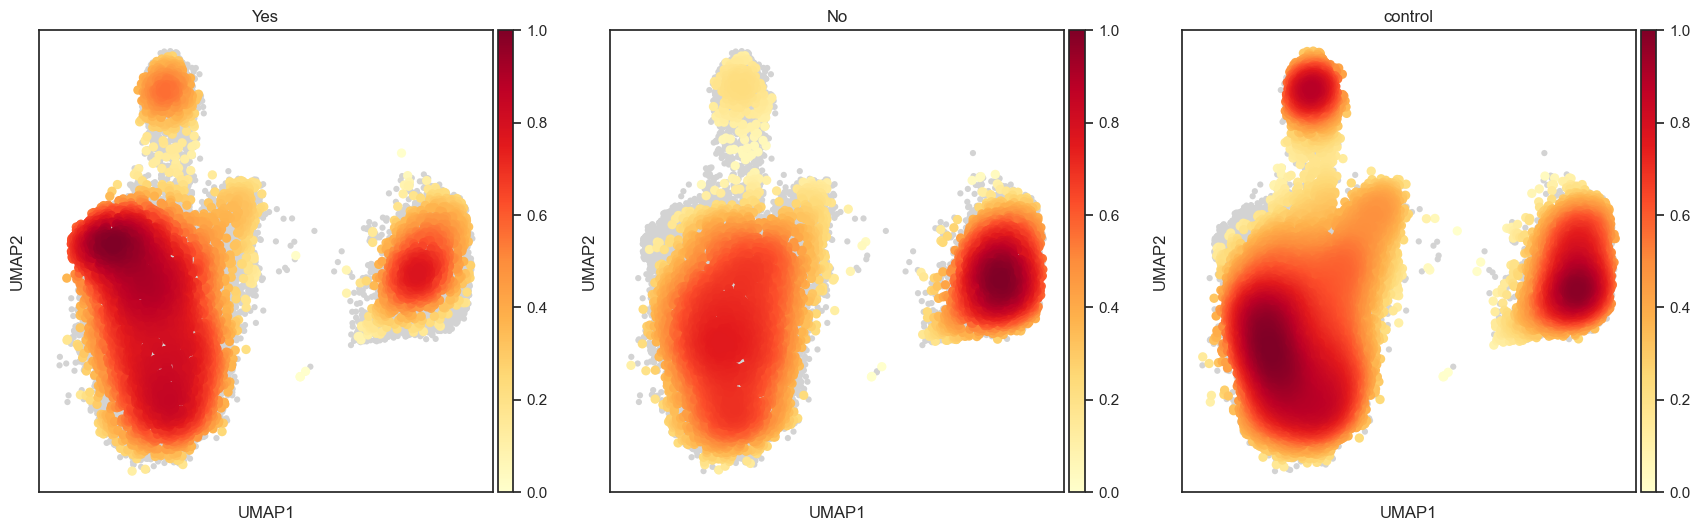

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA disease activity vs control (paired pvals): {'Classical Monocytes': 0.8125, 'IFITM3 Monocytes': 0.015625, 'IL1b-Monocytes': 0.9375, 'Myeloid DCs': 0.109375, 'Non-classical Monocytes': 0.21875}
RA no disease activity vs control (paired pvals): {'Classical Monocytes': 0.65234375, 'IFITM3 Monocytes': 0.12348527214454898, 'IL1b-Monocytes': 0.8203125, 'Myeloid DCs': 0.42578125, 'Non-classical Monocytes': 0.42578125}


/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scipy/stats/_morestats.py:3351: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


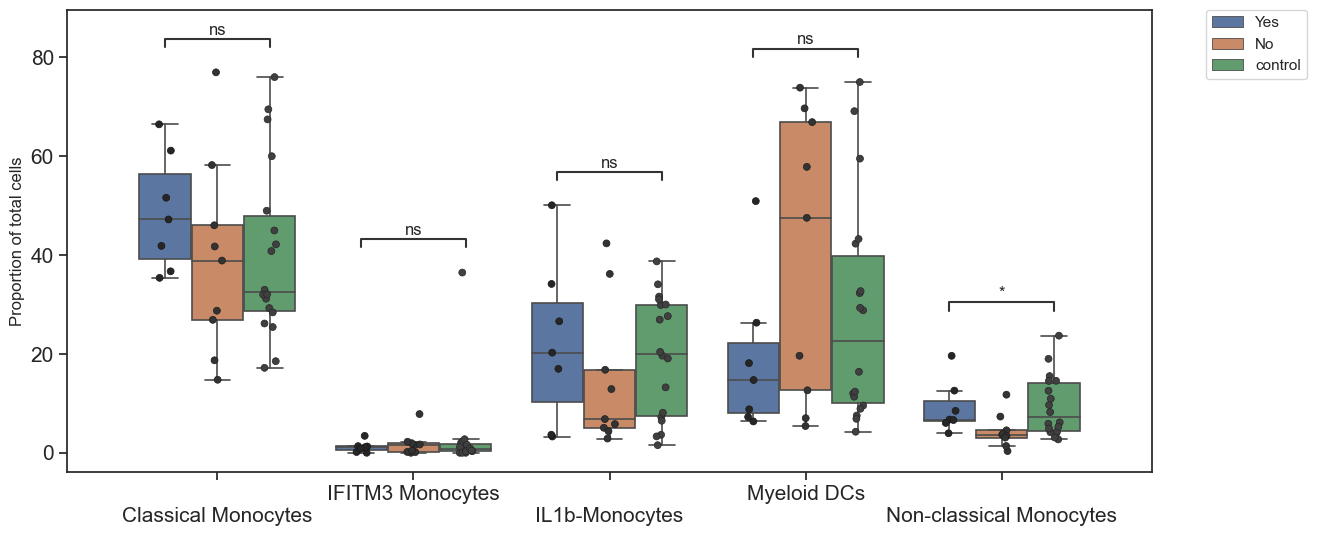

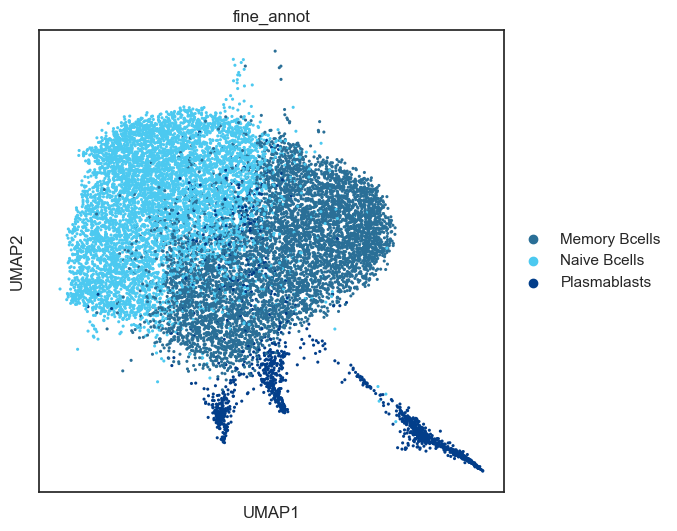

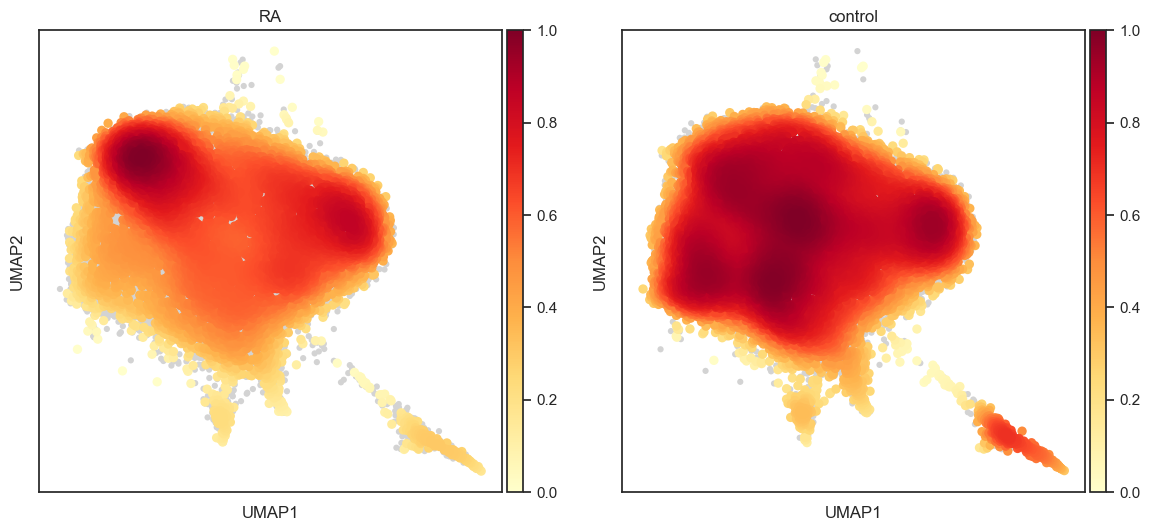

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA vs control (paired pvals): {'Memory Bcells': 0.30379486083984375, 'Naive Bcells': 0.4171142578125, 'Plasmablasts': 0.0599365234375}


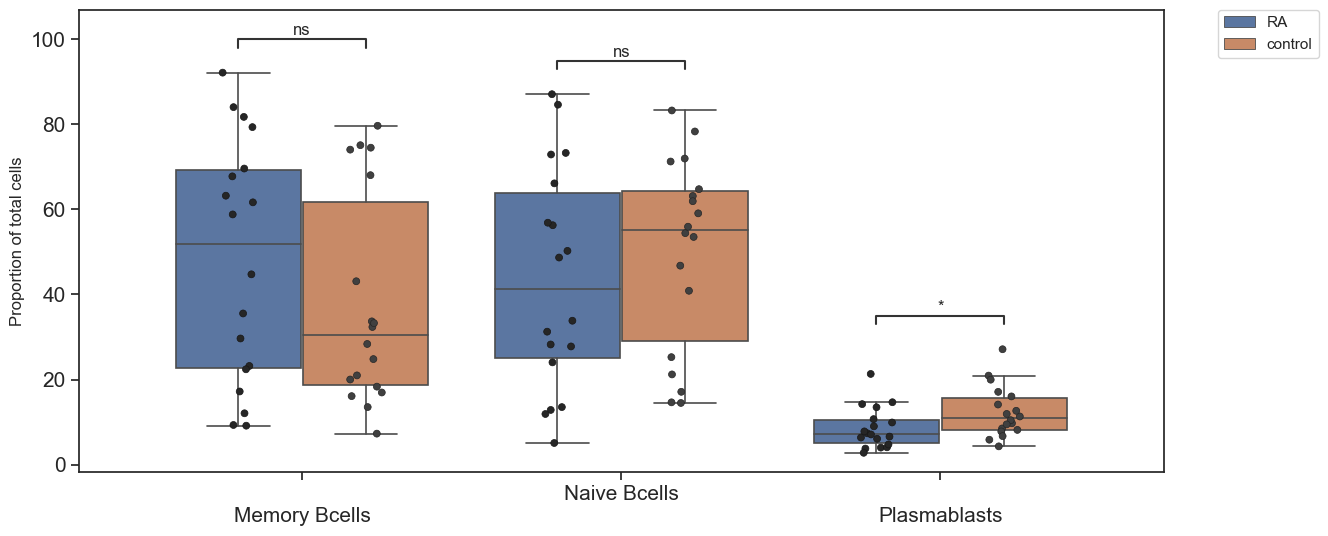

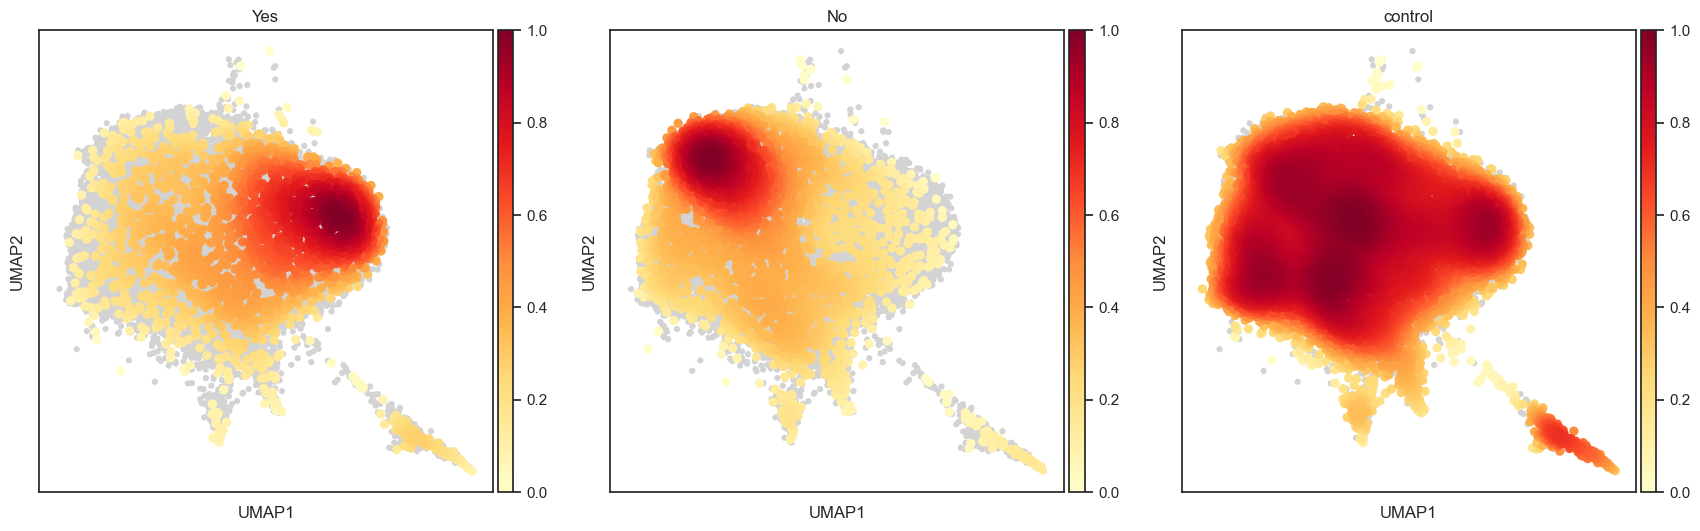

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA disease activity vs control (paired pvals): {'Memory Bcells': 0.078125, 'Naive Bcells': 0.109375, 'Plasmablasts': 0.21875}
RA no disease activity vs control (paired pvals): {'Memory Bcells': 0.5703125, 'Naive Bcells': 0.42578125, 'Plasmablasts': 0.359375}


/Users/bmiao/opt/miniconda3/envs/RAProject/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


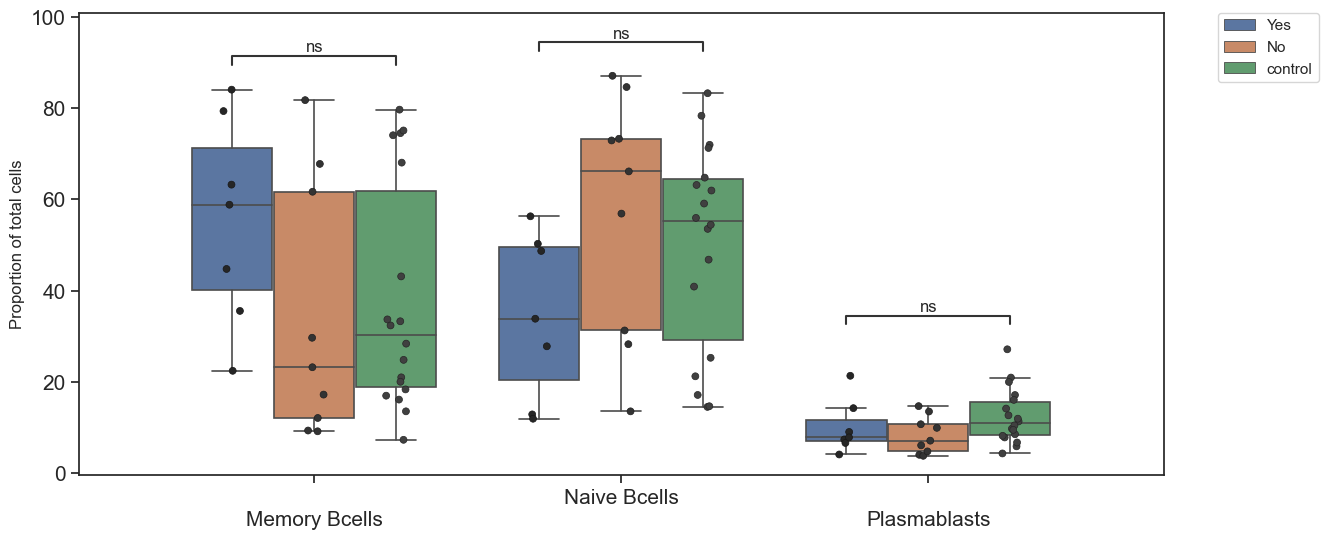

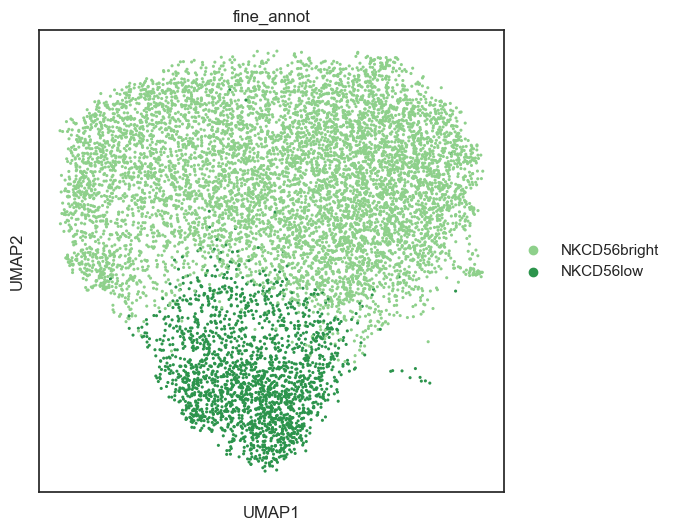

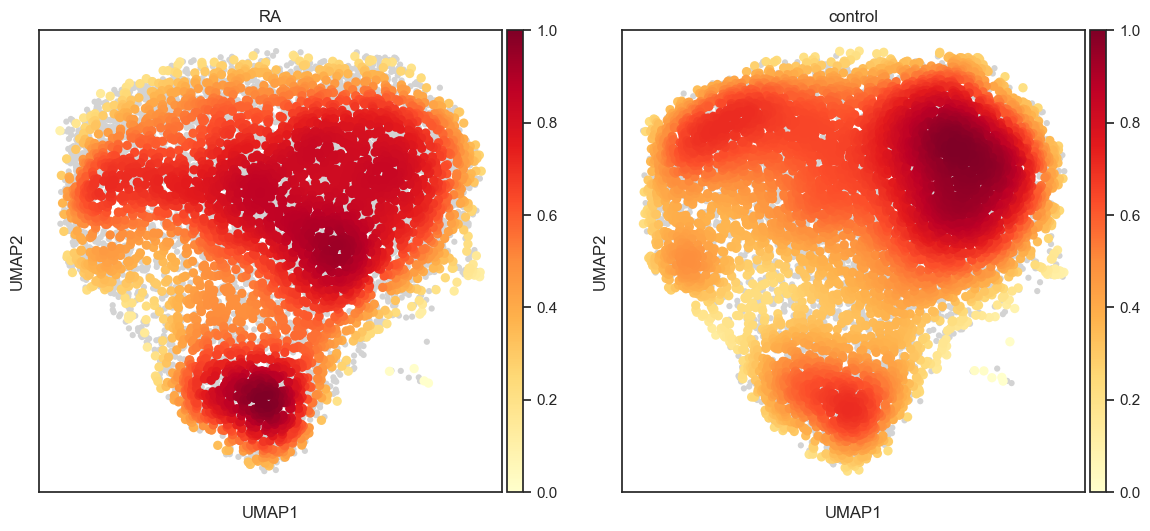

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA vs control (paired pvals): {'NKCD56bright': 0.3692169189453125, 'NKCD56low': 0.3692169189453125}


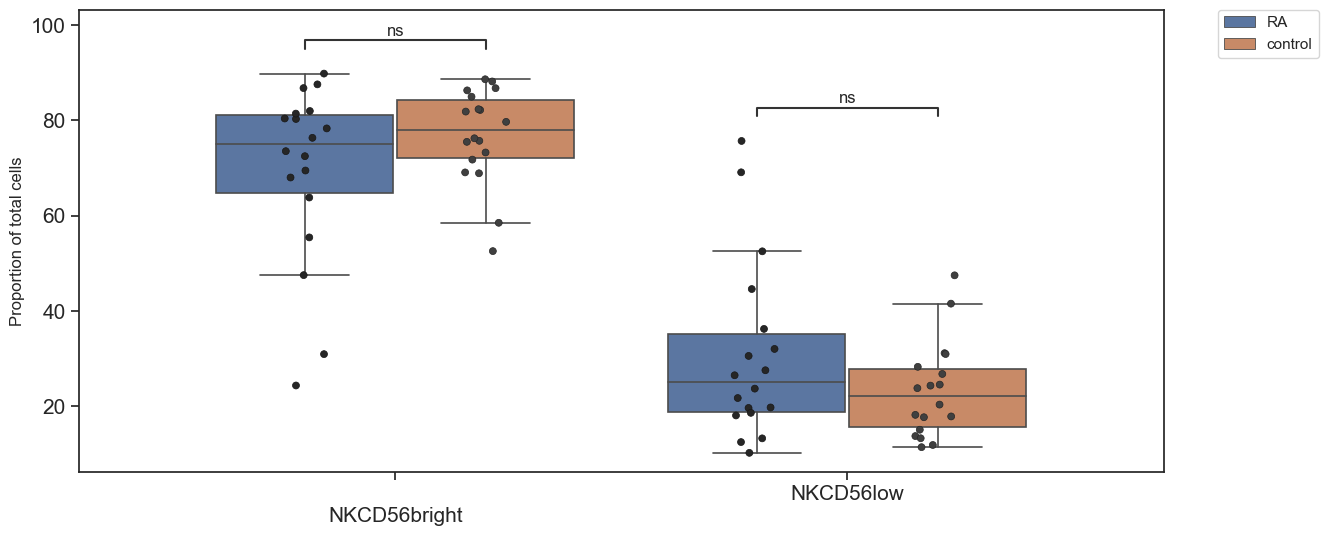

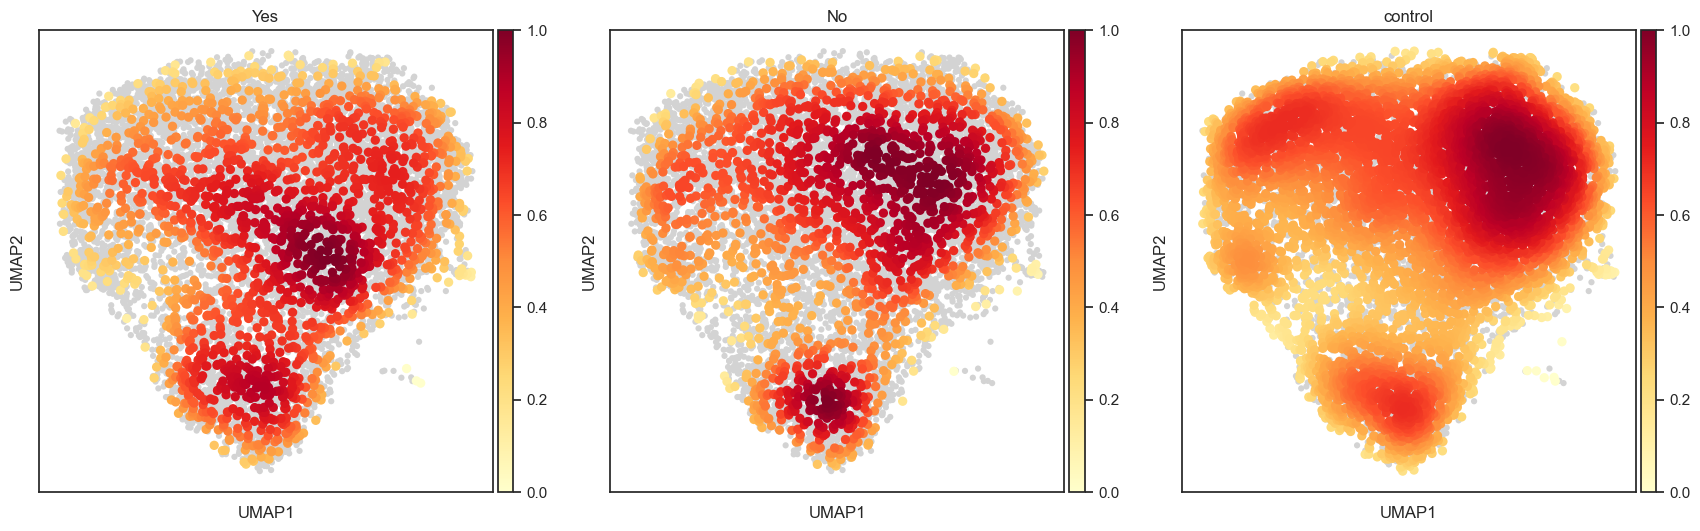

/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_counts['cell_count'] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_counts["count"] = 1
/Users/bmiao/Desktop/ButteLab/SideProjects/RASingleCell/functions/1_DEGAnalysis.py:237: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future 

RA disease activity vs control (paired pvals): {'NKCD56bright': 0.15625, 'NKCD56low': 0.15625}
RA no disease activity vs control (paired pvals): {'NKCD56bright': 0.734375, 'NKCD56low': 0.734375}


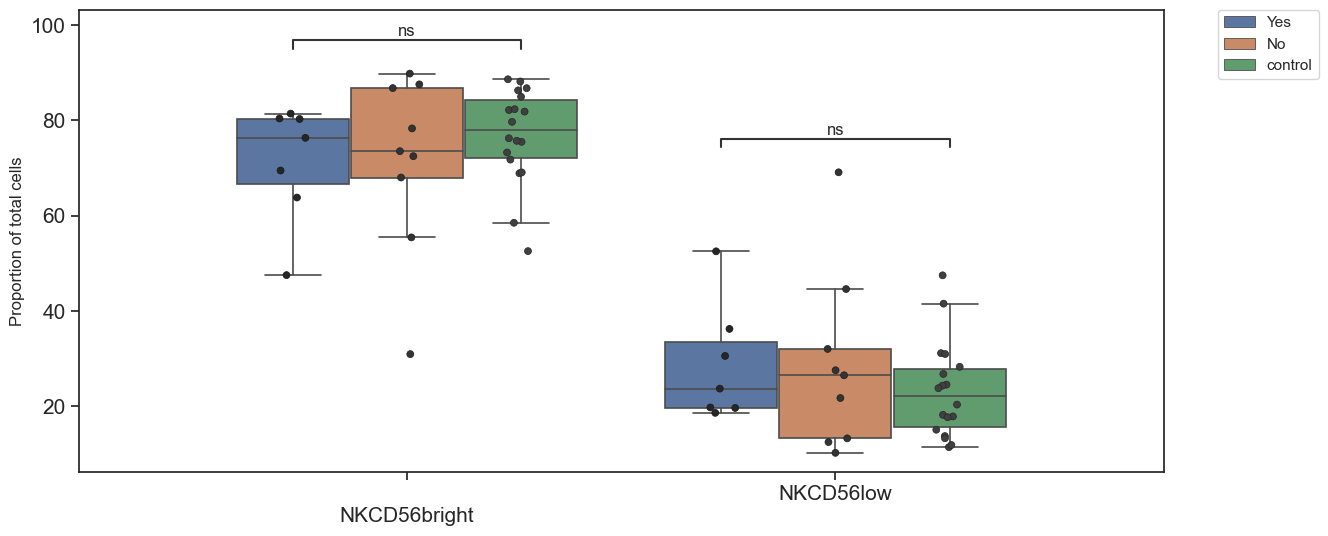

In [65]:
########## Subset UMAPs and top genes
### params
cells=["CD8Tcells", "CD4Tcells", "Monocytes", "Bcells", "NKcells"]
final_annot = "fine_annot"
rank_key = "fine_annotation_rank"
plt.rcParams["figure.figsize"] = (4,4)

### plotting
for subset in cells:
    adata_sub  = sc.read("./dataOutput/subset_adata/" + subset +"_clustered.h5ad")
    sc.pl.umap(adata_sub, color=[final_annot], wspace=0.35, size=20, save="Figure3A_%s_fine_annot.pdf"%subset)
    
    # remove control 7 from batches 1 & 2
    adata_plot=adata_sub[~(adata_sub.obs["Sample"].str.contains("Control07") & adata_sub.obs["batch"].str.contains("1|2")),:]
    
    ### RA vs control
    groupby = "dx"
    # Density plot
    sc.tl.embedding_density(adata_sub, basis='umap', groupby=groupby)
    sc.pl.embedding_density(adata_sub, basis='umap', key="umap_density_%s"%groupby, 
                            group=["RA", "control"], save="Figure3A_%s.pdf"%subset)
    
    # Unpaired proportion analysis (activity vs no activity vs control)
    cell_subset_df = compositionalAnalysis(adata_sub, hue_groups=["RA", "control"], corr=None, 
                                           filename= "./figures/Figure3B_%s_proportion_RAvsControl.pdf"%subset, hue=groupby, 
                                           subset_col=final_annot, sample_col="Sample", single_pair=True, 
                          height=6, width=14, min_cells=0, density=False, stats_test=scipy.stats.mannwhitneyu)
    
    # Paired testing statistics
    cell_subset_df["pair_index_CW"] = cell_subset_df["Sample"].map(dict(zip(adata_sub.obs["Sample"], adata_sub.obs["pair_index_CW"])))
    pvals = pairedTestByCellType(cell_subset_df, subset_col=final_annot, groupby=groupby, 
                         groupA="RA", groupB="control",  pair_index="pair_index_CW", 
                         compare_col="proportion", corr=None, stats_test=scipy.stats.wilcoxon) #ttest_rel
    print("RA vs control (paired pvals): %s"%str(pvals))
    
    ### Disease activity (Yes vs no vs control)
    groupby = "activity_python_binary_crp"
    # Density plot
    sc.tl.embedding_density(adata_sub, basis='umap', groupby=groupby)
    sc.pl.embedding_density(adata_sub, basis='umap', key="umap_density_%s"%groupby, 
                            group=["Yes", "No", "control"], save="Figure3A_%s.pdf"%subset)
    
    # Unpaired proportion analysis (activity vs no activity vs control)
    cell_subset_df = compositionalAnalysis(adata_sub, hue_groups=["Yes", "No", "control"], corr=None, 
                          hue=groupby, subset_col=final_annot, sample_col="Sample", single_pair=True, 
                          height=6, width=14, min_cells=0, density=False, stats_test=scipy.stats.kruskal,
                          filename= "./figures/Figure3B_%s_proportion_RAActivity.pdf"%subset)
    
    # Paired testing statistics
    cell_subset_df["pair_index_CW"] = cell_subset_df["Sample"].map(dict(zip(adata_sub.obs["Sample"], adata_sub.obs["pair_index_CW"])))
    pvals = pairedTestByCellType(cell_subset_df, subset_col=final_annot, groupby=groupby, 
                         groupA="Yes", groupB="control",  pair_index="pair_index_CW", 
                         compare_col="proportion", corr=None, stats_test=scipy.stats.wilcoxon) #ttest_rel
    print("RA disease activity vs control (paired pvals): %s"%str(pvals))

    pvals = pairedTestByCellType(cell_subset_df, subset_col=final_annot, groupby=groupby, 
                         groupA="No", groupB="control",  pair_index="pair_index_CW", 
                         compare_col="proportion", corr=None, stats_test=scipy.stats.wilcoxon) #ttest_rel
    print("RA no disease activity vs control (paired pvals): %s"%str(pvals))

    
    
    

In [ ]:
########## 
### Subset analysis

inputPath = './dataOutput/adata/final.h5ad'
plt.rcParams['figure.figsize'] = [5, 5]
annot = "fine_annot" #fine_annot

adata =sc.read(inputPath)

cell_proportions_temp = getCellSubsetProportions(adata, cluster_col=annot, sample_col="Sample")

### Correlation analysis
cor_temp = adata.obs[["Sample","MY_das28crp4", "activity_python_binary_crp"]]
cor_temp = cor_temp.reset_index(drop = True)
cor_temp = cor_temp.drop_duplicates(subset = ['Sample'])

pd.set_option('display.max_rows', 50)
cor_temp[cor_temp.Sample.duplicated(keep = False)].sort_values(by = 'Sample')

cell_proportions = cell_proportions_temp.merge(cor_temp, on = 'Sample', how = 'left' )

cell_proportions = cell_proportions[cell_proportions['activity_python_binary_crp'] != "NA"]
cell_proportions['MY_das28crp4'] = cell_proportions['MY_das28crp4'].fillna(0)
cell_proportions = cell_proportions[cell_proportions['activity_python_binary_crp'] != "control"]

r_list=[]
p_list=[]

for x in cell_proportions[annot]: #pearson
        plot_df = cell_proportions[cell_proportions[annot] == x]
        r = scipy.stats.spearmanr(plot_df["MY_das28crp4"], plot_df['proportion'])[0]
        p = scipy.stats.pearsonr(plot_df["MY_das28crp4"], plot_df['proportion'])[1]
        
        r_list.append(r)
        p_list.append(p)
        if abs(r) >= 0:
            g = sns.lmplot(data=plot_df, x="MY_das28crp4", y="proportion")
            g.set_axis_labels('DAS 28 CRP',str(x))
            ax = plt.gca()
            ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p), transform=ax.transAxes)
            plt.grid()
            
cell_proportions["r"] = r_list
cell_proportions["p"]= p_list


heatmap_df = cell_proportions[[annot, "r"]]
heatmap_df = heatmap_df.set_index(annot, drop = True)
heatmap_df = heatmap_df.drop_duplicates()

sns.heatmap(heatmap_df, cmap = "bwr")


import matplotlib.pyplot as plt
import numpy as np

# your input data:
befores = np.random.rand(10)
afters = np.random.rand(10)

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before', 'after'])

plt.show()
